# http://karpov.courses

In [1]:
# imports for the whole notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

### Описание данных
* date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
* name – имя пользователя
* transaction – статус транзакции
* minute – сколько минут прошло с начала дня

### Задание 1
Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Вопрос: сколько в датасете пропущенных значений?

In [2]:
df = pd.read_csv('transaction_data.csv')
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [4]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


Явная проверка на наличие NaN:

In [5]:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

### Задание 2
Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

Расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему).

In [6]:
df_vis = df.groupby(by='transaction').agg({'date': 'count'}) \
    .rename(columns={'date': 'observations'}) \
    .sort_values(by='observations', ascending=False)
df_vis

,observations
transaction,
successfull,3692
cancelled,1619
error,4


/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


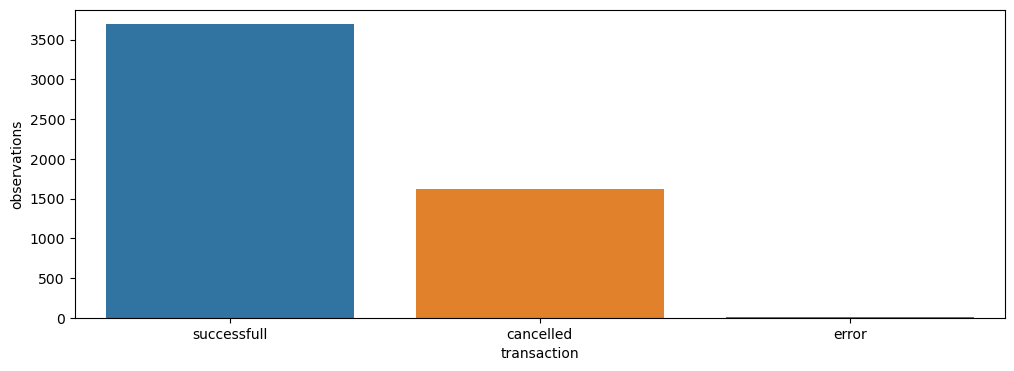

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(data=df_vis, x=df_vis.index, y='observations', ax=ax);

### Задание 3
Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

* по оси x – число транзакций
* по оси y – доля пользователей с таким числом транзакций

In [8]:
dist_df = df.groupby(by='name').agg({'transaction': 'value_counts'}) \
        .rename(columns={'transaction': 'number'})
dist_df.head(10)

number
name               transaction        
Ekaterina_Fedorova successfull      72
                   cancelled        37
Ekaterina_Ivanova  successfull      59
                   cancelled        24
Ekaterina_Lesnova  successfull      63
                   cancelled        24
Ekaterina_Ozerova  successfull      72
                   cancelled        37
                   error             1
Ekaterina_Petrova  successfull      68

In [9]:
dist_df = pd.pivot(dist_df.reset_index(),
                   columns='transaction', index='name', values='number')
dist_df.columns.rename(None, inplace=True)  # clear "columns name"
dist_df.rename(columns={'successfull': 'n_of_successes'}, inplace=True)  # meaningful name
dist_df.drop(columns=['cancelled', 'error'], inplace=True)  # remove unnecessary col 
dist_df.head()

,n_of_successes
name,
Ekaterina_Fedorova,72.0
Ekaterina_Ivanova,59.0
Ekaterina_Lesnova,63.0
Ekaterina_Ozerova,72.0
Ekaterina_Petrova,68.0


In [10]:
dist_df.describe()

,n_of_successes
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [11]:
hist_df = dist_df.reset_index().groupby(by='n_of_successes', as_index=False) \
    .agg({'name': 'count'}) \
    .rename(columns={'name': 'occurrences'})
hist_df.head()

,n_of_successes,occurrences
0,46.0,1
1,52.0,1
2,55.0,2
3,56.0,1
4,57.0,1


/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


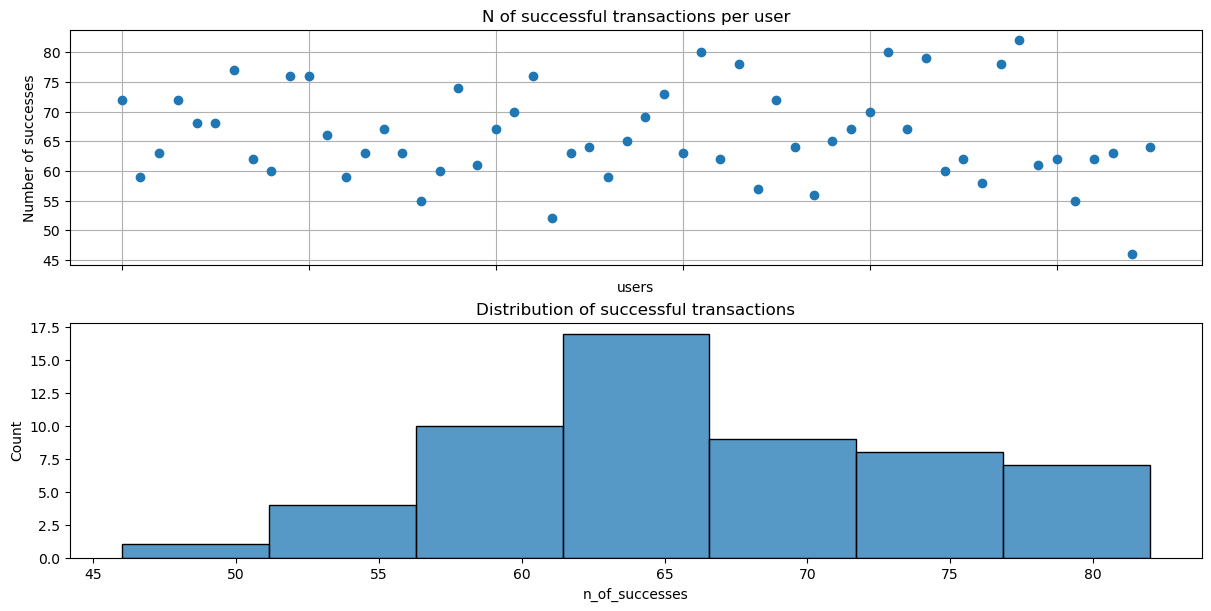

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), layout="constrained");

ax1.plot(dist_df.n_of_successes.values, marker='o', linestyle='')
ax1.set_xticklabels([])  # remove x-axis tick labels
ax1.set(title='N of successful transactions per user',
       ylabel='Number of successes',
       xlabel='users')
ax1.grid()

sns.histplot(data=dist_df, x='n_of_successes', ax=ax2)
ax2.set_title('Distribution of successful transactions');

### Задание 4
💀 Сложное задание! 💀

К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:
* столбцы – имена пользователей
* строки – минута времени осуществления операции (minute)
* значения – число совершённых операций

Пропущенные значения заполните нулями.

Note: фильтровать успешные транзакции не нужно - постройте табличку по всем.

In [13]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [14]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 124.7+ KB


In [15]:
df.rename(inplace=True, columns={'date': 'full_date'})
df['only_minutes'] = df['full_date'].dt.minute
df.head()

,full_date,name,transaction,only_minutes
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [16]:
user_vs_minute_pivot = pd.pivot_table(data=df, index='only_minutes', columns='name',
               values='transaction',  aggfunc = 'count',).fillna(0)
user_vs_minute_pivot.head(10)

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
only_minutes,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


### Задание 5
Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).<br>

Например:<br>
date                name               transaction  minute  true_minute<br>
2020-03-02 00:37:20 Ekaterina_Petrova  cancelled    37      37<br>
2020-03-02 01:06:14 Ekaterina_Smirnova successfull  6       66<br>

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   full_date     5315 non-null   datetime64[ns]
 1   name          5315 non-null   object        
 2   transaction   5315 non-null   object        
 3   only_minutes  5315 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 145.5+ KB


In [18]:
# the result of these manipulations is int, which is interesting
df = df.assign(
    true_minute=df['full_date'].dt.minute + 60*df['full_date'].dt.hour)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   full_date     5315 non-null   datetime64[ns]
 1   name          5315 non-null   object        
 2   transaction   5315 non-null   object        
 3   only_minutes  5315 non-null   int32         
 4   true_minute   5315 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 166.2+ KB


,full_date,name,transaction,only_minutes,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


In [19]:
temp = df.groupby(by='only_minutes', as_index=False) \
    .agg({'transaction': 'count'})
temp.head()

,only_minutes,transaction
0,0,111
1,1,145
2,2,123
3,3,129
4,4,92


/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


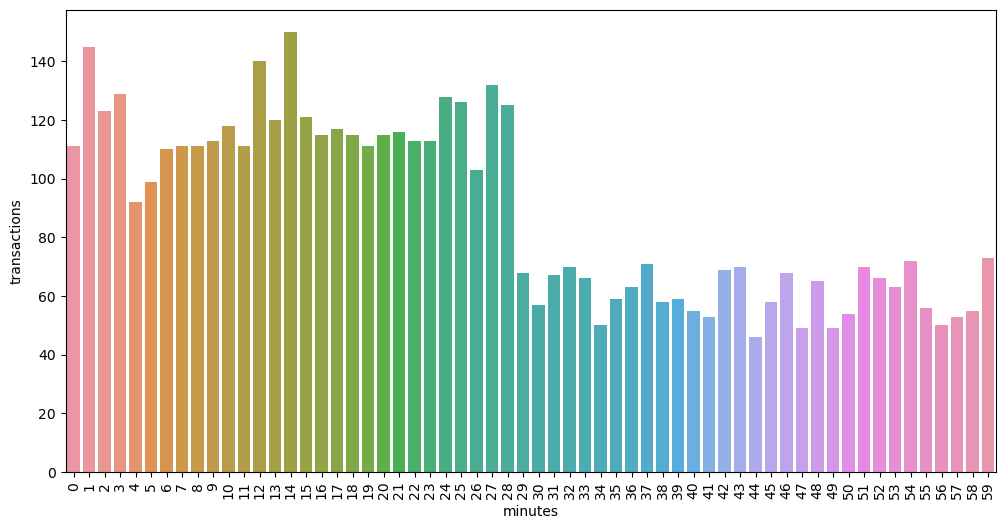

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(ax=ax, data=temp, x='only_minutes', y='transaction')
ax.set(xlabel='minutes', ylabel='transactions', )
ax.tick_params(axis='x', labelrotation = 90);

### Дополнительный проект
В папке subsid находятся файлы (tm_sales_1, tm_sales_2, ...) с продажами продуктов через телемаркетинг. Каждый файл содержит, как минимум, 4 колонки (поля): FILIAL_ID, SUBS_ID, PROD_ID, ACT_DTTM.

Суть задачи в том, чтобы проверить подключения продуктов определенным пользователям, соединив файлы о продажах с логами по подключениям в системе.

Особенности данных:
1. сотрудники телемаркетинга не всегда указывают полный id, если 'id' нет в начале SUBS_ID, то нужно его добавить
2. поля в файлах могут быть расположены абсолютно случайным образом, но названия полей статичны
3. продажа не засчитывается, если отключение (END_DTTM) произошло меньше чем через 5 минут после подключения (START_DTTM)
4. если в файле с продажами встречается строка без указанного SUBS_ID, она пропускается

Сохраните результат в csv файл с разделителем ';', содержащий корректные подключения.

Note: обратите внимание на то, как pandas переводит дату из строки, возможно вам понадобится параметр format

💀 Сложное задание! 💀

Для проверки результатов введите SUBS_ID из полученного датасета в порядке возрастания, через запятую с пробелом. Например:
<br>*id1, id2*

Считывание путей только до "реальных" csv:

In [21]:
files_path = []

# Create a Path object for the root directory
root_directory = Path('subsid')

# Use rglob to iterate through all files and directories recursively
for file_path in root_directory.rglob('*.csv'):
    print(file_path)
    if '.ipynb_checkpoints' in str(file_path):
        continue
    files_path.append(file_path)
    
print(files_path)    

subsid/tm_sales_1.csv
subsid/tm_sales_2.csv
subsid/tm_sales_3.csv
subsid/prod_activations_logs.csv
subsid/.ipynb_checkpoints/tm_sales_1-checkpoint.csv
subsid/.ipynb_checkpoints/tm_sales_2-checkpoint.csv
subsid/.ipynb_checkpoints/tm_sales_3-checkpoint.csv
subsid/.ipynb_checkpoints/prod_activations_logs-checkpoint.csv
[PosixPath('subsid/tm_sales_1.csv'), PosixPath('subsid/tm_sales_2.csv'), PosixPath('subsid/tm_sales_3.csv'), PosixPath('subsid/prod_activations_logs.csv')]


#### Что из себя представляют 2 имеющихся типа таблиц:

In [22]:
df_logs = pd.read_csv(files_path[-1], sep=';')
df_logs.head()
# pandas reads first column of csv-file as indices!

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM
1,id4651830,1954,20-03-2020 14:59,01-12-2020 00:00
5,id7646509,6431,19-03-2020 13:00,19-03-2020 13:03
2,id7461794,3310,20-03-2020 17:25,01-12-2020 00:00
3,id5416547,1743,17-03-2020 10:17,25-03-2020 11:00
4,id8238421,1859,01-03-2020 11:42,01-03-2020 11:43


In [23]:
df_sales = pd.read_csv(files_path[0], sep=';')
df_sales.head()

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25


In [24]:
# delete all data from this df; it will be used as a template for the next step
df_sales.drop(index=df_sales.index, inplace=True)
df_sales

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM


#### Реализация чтения всех файлов и их уместное сохранение:

In [25]:
for file_path in files_path:
    if 'tm_sales' in file_path.name:
        df_sales = pd.concat([df_sales, pd.read_csv(file_path, sep=';')],
                             ignore_index=True)
    elif 'prod_activations_logs' in file_path.name:
        df_logs = pd.read_csv(file_path, sep=';').reset_index()
        df_logs.drop(columns='index', inplace=True)        
        
# df_sales.head()
# df_logs.head()

#### Обработка df_sales:

In [26]:
df_sales.info()
# there is a NaN value in 'SUBS_ID'
# some IDs don't have required prefix
# ACT_DTTM isn't datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SUBS_ID    9 non-null      object
 1   FILIAL_ID  10 non-null     int64 
 2   PROD_ID    10 non-null     int64 
 3   ACT_DTTM   10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [27]:
def check_id(text):
    if 'id' in text:
        return text
    else:
        return 'id' + text

In [28]:
df_sales.dropna(axis='index', how='any', inplace=True)
df_sales['SUBS_ID'] = df_sales['SUBS_ID'].apply(check_id)
df_sales['ACT_DTTM'] = pd.to_datetime(df_sales['ACT_DTTM'], dayfirst=True)
df_sales

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,2020-03-20 14:59:00
1,id7646509,5,6431,2020-03-19 13:00:00
2,id7412683,4,3313,2020-03-22 17:25:00
3,id5416547,3,1743,2020-03-17 10:17:00
5,id8362218,7,9879,2020-03-05 11:42:00
6,id2185490,2,3210,2020-03-16 16:28:00
7,id5764122,3,1499,2020-03-18 15:44:00
8,id7642700,6,3020,2020-03-15 14:21:00
9,id1374509,2,5677,2020-03-17 11:48:00


In [29]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SUBS_ID    9 non-null      object        
 1   FILIAL_ID  9 non-null      int64         
 2   PROD_ID    9 non-null      int64         
 3   ACT_DTTM   9 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 360.0+ bytes


#### Обработка df_logs:

In [30]:
df_logs.info()
# START_DTTM and END_DTTM isn't datetime
# Need to filter out END_DTTM - START_DTTM = 5 minutes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SUBS_ID     9 non-null      object
 1   PROD_ID     9 non-null      int64 
 2   START_DTTM  9 non-null      object
 3   END_DTTM    9 non-null      object
dtypes: int64(1), object(3)
memory usage: 416.0+ bytes


In [37]:
df_logs['START_DTTM'] = pd.to_datetime(df_logs['START_DTTM'], dayfirst=True)
df_logs['END_DTTM'] = pd.to_datetime(df_logs['END_DTTM'], dayfirst=True)
df_logs['time_difference_sec'] = (df_logs['END_DTTM'] - df_logs['START_DTTM']).dt.total_seconds() 
df_logs['time_difference_min'] = df_logs['time_difference_sec'] / 60
df_logs = df_logs[df_logs["time_difference_min"] > 5].reset_index(drop=True)
df_logs

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM,time_difference_sec,time_difference_min
0,id4651830,1954,2020-03-20 14:59:00,2020-12-01 00:00:00,22064460.0,367741.0
1,id7461794,3310,2020-03-20 17:25:00,2020-12-01 00:00:00,22055700.0,367595.0
2,id5416547,1743,2020-03-17 10:17:00,2020-03-25 11:00:00,693780.0,11563.0
3,id8641743,2752,2020-03-20 15:44:00,2020-04-21 15:44:00,2764800.0,46080.0
4,id2185490,3210,2020-03-16 16:28:00,2020-12-01 00:00:00,22404720.0,373412.0
5,id7642700,3020,2020-03-15 14:21:00,2020-03-15 23:42:00,33660.0,561.0
6,id8741631,5677,2020-03-19 12:28:00,2020-12-01 00:00:00,22159920.0,369332.0


#### Объединения df_logs & df_sales, сохранение результата:

In [32]:
df_sales

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,2020-03-20 14:59:00
1,id7646509,5,6431,2020-03-19 13:00:00
2,id7412683,4,3313,2020-03-22 17:25:00
3,id5416547,3,1743,2020-03-17 10:17:00
5,id8362218,7,9879,2020-03-05 11:42:00
6,id2185490,2,3210,2020-03-16 16:28:00
7,id5764122,3,1499,2020-03-18 15:44:00
8,id7642700,6,3020,2020-03-15 14:21:00
9,id1374509,2,5677,2020-03-17 11:48:00


In [33]:
df_logs

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM,time_difference_sec,time_difference_min
0,id4651830,1954,2020-03-20 14:59:00,2020-12-01 00:00:00,22064460.0,367741.0
2,id7461794,3310,2020-03-20 17:25:00,2020-12-01 00:00:00,22055700.0,367595.0
3,id5416547,1743,2020-03-17 10:17:00,2020-03-25 11:00:00,693780.0,11563.0
5,id8641743,2752,2020-03-20 15:44:00,2020-04-21 15:44:00,2764800.0,46080.0
6,id2185490,3210,2020-03-16 16:28:00,2020-12-01 00:00:00,22404720.0,373412.0
7,id7642700,3020,2020-03-15 14:21:00,2020-03-15 23:42:00,33660.0,561.0
8,id8741631,5677,2020-03-19 12:28:00,2020-12-01 00:00:00,22159920.0,369332.0


In [34]:
df_combined = pd.merge(left=df_logs, right=df_sales, how='inner')
df_combined

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM,time_difference_sec,time_difference_min,FILIAL_ID,ACT_DTTM
0,id4651830,1954,2020-03-20 14:59:00,2020-12-01 00:00:00,22064460.0,367741.0,1,2020-03-20 14:59:00
1,id5416547,1743,2020-03-17 10:17:00,2020-03-25 11:00:00,693780.0,11563.0,3,2020-03-17 10:17:00
2,id2185490,3210,2020-03-16 16:28:00,2020-12-01 00:00:00,22404720.0,373412.0,2,2020-03-16 16:28:00
3,id7642700,3020,2020-03-15 14:21:00,2020-03-15 23:42:00,33660.0,561.0,6,2020-03-15 14:21:00


In [35]:
df_combined.to_csv('miniproject_5_result.csv', sep=';', index=False)

In [36]:
answer = ''
for i in np.sort(df_combined['SUBS_ID'].values):
    text = f'{i}, '
    answer+=text
answer

'id2185490, id4651830, id5416547, id7642700, '